# Ensembles

We have seen in the slides presentation that ensemble methods are better than simple classifiers, as decision trees. But how do ensembles compare? Which one should we use? The answer is that there is no silver bullet, and it dependes on the data, the task and the parameters.  
Let's explore some ensemble techniques.

In [0]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (15,6)

The three most popular methods for combining the predictions from different models are:

+ Bagging/Pasting.  
Building multiple models (typically of the same type) from different subsamples of the training dataset.  
+ Boosting.  
Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.  
+ Stacking/Voting.  
Building multiple models (typically of differing types) and creating a meta-learner with the features of the models, or simple statistics (like calculating the mean) to combine predictions.

## Load dataset for ensembles comparison

We are loading the Pima Indians Diabetes Database  
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content  
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements  
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [0]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv("Data/pima-indians-diabetes.data.csv", names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
array = df.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

Note that even if we set a random seed, our results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

#### Decision Tree
First, let's try with a simple Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

cart1 = DecisionTreeClassifier()
results1 = cross_val_score(cart1, X, Y, cv=kfold)
print(results1.mean())

0.6837833219412166


#### Bagged Decision Trees  
Now, let's use the Scikit-Learn bagging classifier to manually create a Random Forest

In [0]:
from sklearn.ensemble import BaggingClassifier

num_trees = 100
cart2 = DecisionTreeClassifier()
model2 = BaggingClassifier(base_estimator=cart2, n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
print(results2.mean())

0.7578263841421736


### Random Forest

Random forest is an extension of bagged decision trees.
Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of the tree, only a random subset of features are considered for each split.

In [0]:
from sklearn.ensemble import RandomForestClassifier

max_features = 3
model3 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)
results3 = cross_val_score(model3, X, Y, cv=kfold)
print(results3.mean())

0.759107997265892


### Extra Trees

[Extra Trees](https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/) are another modification of bagging where random forests are constructed from the whole training dataset.
You can construct an Extra Trees model for classification using the ExtraTreesClassifier class.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

max_features = 7
model4 = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)
results4 = cross_val_score(model4, X, Y, cv=kfold)
print(results4.mean())

0.7682501708817498


### Boosting Algorithms  


Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence. 
Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction. The two most common boosting ensemble machine learning algorithms are:

+ AdaBoost
+ Stochastic Gradient Boosting

#### AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.  
You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

In [0]:
from sklearn.ensemble import AdaBoostClassifier

model5 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results5 = cross_val_score(model5, X, Y, cv=kfold)
print(results5.mean())

0.7578605604921395


#### Stochastic Gradient Boosting  

Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.  
You can construct a Gradient Boosting model for classification using the GradientBoostingClassifier class.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

model6 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results6 = cross_val_score(model6, X, Y, cv=kfold)
print(results6.mean())

0.7591934381408066


#### XGBoost  

[XGBoost](https://xgboost.readthedocs.io/en/stable/) is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

In [0]:
# !pip install -U xgboost

In [0]:
from xgboost import XGBClassifier

model7 = XGBClassifier(n_estimators=200, max_depth=8, use_label_encoder=False, eval_metric="logloss")
results7 = cross_val_score(model7, X, Y, cv=kfold)
print(results7.mean())

0.7305365686944635


#### Regularized Greedy Forest  

The RGF is a powerful technique developed by Rie Johnson and Tong Zhang in the paper ["Learning Nonlinear Functions Using Regularized Greedy Forest"](https://arxiv.org/pdf/1109.0887.pdf).  
It is on a par with gradient boosting tools like [XGBoost](https://xgboost.ai/). An ensemble of the solutions produced form these methods may well be good enough to win a kaggle competition.

In [0]:
!pip install -U -q rgf-python

In [0]:
from rgf.sklearn import RGFClassifier

model8 = RGFClassifier(max_leaf=300, algorithm="RGF_Sib", test_interval=100)
results8 = cross_val_score(model8, X, Y, cv=kfold)
print(results8.mean())

0.7578092959671907


### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.
It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. 
You can create a voting ensemble model for classification using the VotingClassifier class.
The code below provides an example of combining the predictions of logistic regression, classification and regression trees and support vector machines together for a classification problem.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

estimators1 = [('logistic',LogisticRegression(solver='lbfgs', max_iter=300, random_state=seed)),
              ('cart', DecisionTreeClassifier(random_state=seed)),
              ('svm',SVC(random_state=seed))
             ]

# create the ensemble model
model9 = VotingClassifier(estimators1)
results9 = cross_val_score(model9, X, Y, cv=kfold)
print(results9.mean())

0.7721804511278196


#### Stacking Classifier

More advanced methods, similar to Voting, can learn how to best weight the predictions from submodels (stacked generalization)  
We can use the Stacking Classifier from Scikit-Learn

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators2 = [('logistic', make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=300, random_state=seed))),
               ('rf', RandomForestClassifier(n_estimators=num_trees, random_state=seed)),
               ('svm', make_pipeline(StandardScaler(), SVC(random_state=seed)))
              ]
              
              
model10 = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression(solver='lbfgs', max_iter=300, random_state=seed))
results10 = cross_val_score(model10, X, Y, cv=kfold)
print(results10.mean())

0.7708475734791523


You can check how we have improved simple classifiers using ensembles.

Out[96]: <BarContainer object of 10 artists>

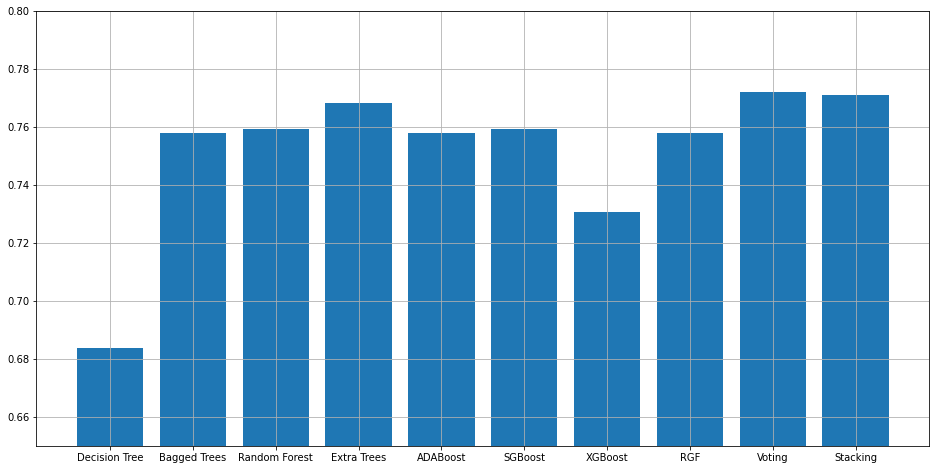

In [0]:
results = [np.mean(eval(f"results{number}")) for number in range(1,11)]
plt.figure(figsize=(16,8))
locs, labels = plt.xticks()  # Get the current locations and labels.
x = np.arange(1, 11, step=1)
plt.xticks(x, ['Decision Tree', 'Bagged Trees', 'Random Forest', 'Extra Trees', 'ADABoost', 'SGBoost', 'XGBoost', 'RGF', 'Voting', 'Stacking'])  # Set text labels.
plt.ylim([0.65,0.8])
plt.grid()
plt.bar(x, results)

# Task

+ Change the parameters of the estimators above
+ Try to optmize and discuss the results

Additional reading: [scaling and adjust LR models](https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati)  
Some material inspired by this [Source](https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/)